# Notebook activity B1.2 Applying hierarchical clustering to the Ada Tepe dataset

In this notebook activity, we will explore the archaeological data from the Ada Tepe dataset that was introduced in Subsection 3.4 of Unit B1. Recall that the study these data are obtained from relates to samples taken from a dig at Ada Tepe in South-Eastern Bulgaria. The dataset includes the following four variables, all relating to the magnetic properties of the sample: 

- mass specific magnetic susceptibility (`magSus`)
- the log of the ratio of magnetic suspectibility measured by anhysteretic remanent magnetization to frequency-dependent magnetic susceptibility (`logRatio1`)
- the log of the ratio of magnetic suspectibility measured by anhysteretic remanent magnetization to isothermal magnetization (`logRatio2`)
- the square-root of the hard-coercivity remanent magnetization (`sqrtHIRM`).

(These transformations were chosen after some exploratory data analysis, so that the distributions were approximately normal.)

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the adaTepe data frame
data(adaTepe)
# Check the data frame has loaded OK
head(adaTepe)

### (ii)

Obtain a summary of the data. What do you notice about the range of values for each variable?

#### Solution <a class="tocSkip">

Running the code below produces the summary of the data. From the summary we can see that the different variables have very different spreads. For example, `magSus` ranges between $9.73$ and $518.92$, whereas `logRatio2` ranges just between $-1.27$ and $0.36$. 

In [2]:
summary(adaTepe)

     magSus         logRatio1       logRatio2          sqrtHIRM    
 Min.   :  9.73   Min.   :2.907   Min.   :-1.2730   Min.   : 8.66  
 1st Qu.:102.63   1st Qu.:3.919   1st Qu.:-0.6349   1st Qu.:22.97  
 Median :205.27   Median :4.176   Median :-0.5447   Median :26.46  
 Mean   :189.62   Mean   :4.134   Mean   :-0.5032   Mean   :26.55  
 3rd Qu.:269.57   3rd Qu.:4.388   3rd Qu.:-0.3567   3rd Qu.:30.00  
 Max.   :518.92   Max.   :5.659   Max.   : 0.3577   Max.   :48.99  

## (b) Standardising variables

In Box 5 (Section 1.2, Unit B1), it was mentioned that all variables should be standardised if Eucldiean distance is going to be used. We will do that by applying the following transformation to a variable:
$$z_i = \frac{x_i - \bar{x}}{s},$$ 
where
$x_i$ is the $i$th observation of the variable being transformed, $z_i$ is its transformed value, $\bar{x}$ is the (sample) mean of $X$, the variable to be standardised, and $s$ is its (sample) standard deviation.

In Notebook activity 1.15, you learned that the functions `mean()` and `sd()` can be used to calculate the mean and standard deviation of some data. So, for example, the following would work for the first variable, `magSus`:
```
zMagSus <- (magSus - mean(magSus))/sd(magSus)
```
However, even with just four variables in the data frame, it is tedious to standardise each variable this way. So, instead, we will make use of  following function in R:
```
scale(dataframe)
```
This function allows us to standardise all the variables in the data frame at once.

### (i)

Standardise the variables in the `adaTepe` data frame, saving the results in a new object called `zAdaTepe`. Then summarise the standardised data. 

Are the ranges of the variables in `zAdaTepe` similiar?

#### Solution <a class="tocSkip">

Running the code below standardises the variables in `adaTepe`, saves the results in `zAdaTepe` and then gives the summary of the standardised data in `zAdaTepe`. From this summary, the minimum values of all variables are between $-3.0$ and $-1.7$, and the maximum values are between $3.0$ and $3.8$. So yes, all the ranges in the standardised data are now similar.

In [3]:
zAdaTepe <- scale(adaTepe)
summary(zAdaTepe)

     magSus          logRatio1          logRatio2          sqrtHIRM       
 Min.   :-1.6630   Min.   :-2.81096   Min.   :-2.9909   Min.   :-3.02396  
 1st Qu.:-0.8041   1st Qu.:-0.49220   1st Qu.:-0.5115   1st Qu.:-0.60615  
 Median : 0.1447   Median : 0.09491   Median :-0.1613   Median :-0.01633  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7391   3rd Qu.: 0.58072   3rd Qu.: 0.5694   3rd Qu.: 0.58233  
 Max.   : 3.0443   Max.   : 3.49478   Max.   : 3.3451   Max.   : 3.79148  

## (c) Plotting the data

In Subsection 1.1 of Unit B1, we used histograms and scatterplots to take an initial look at the data. Recall, from Notebook activity 2.6, that a matrix scatterplot can be produced using the command `pairs()`.

### (i)

Produce a matrix scatterplot of the data in `zAdaTepe`. 

Does this suggest that there are clusters in the data? If so, how many clusters does there appear to be?

#### Solution <a class="tocSkip">

Running the code below produces the matrix scatterplot of the data in `zAdaTepe`. From the matrix scatterplot, there does not appear to be any clear clusters.

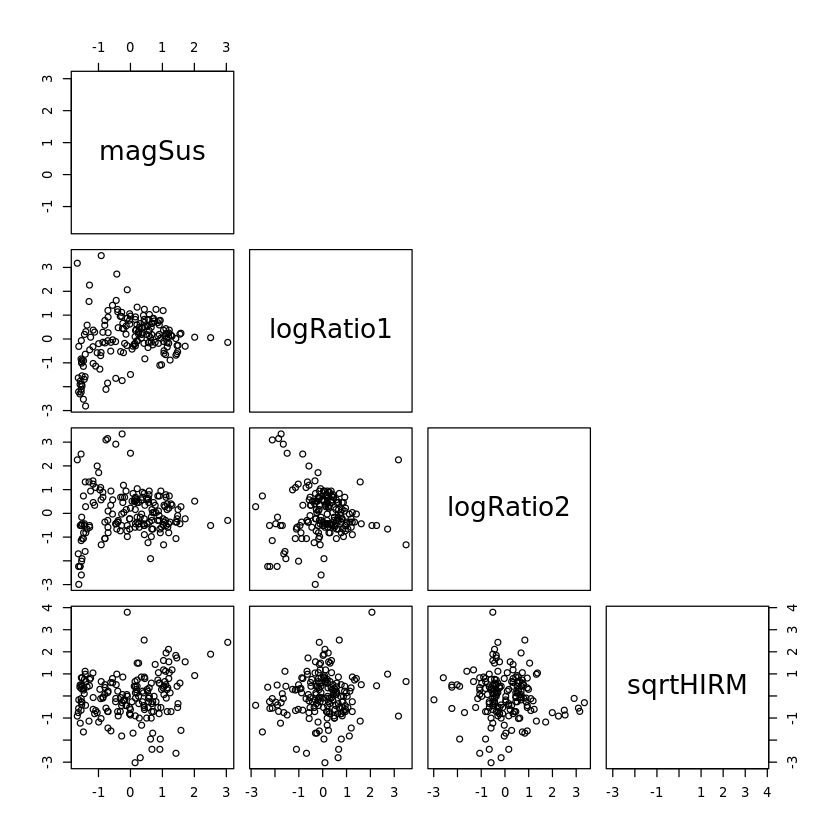

In [4]:
pairs(zAdaTepe, upper.panel=NULL)

###  <a class="tocSkip">

Even with just four variables, getting a clear picture of any structure in the data from the matrix scatterplot can be difficult. What is often done instead is that a two-dimensional approximation of the data is obtained. This can then be easily plotted on a scatterplot. 

There are different ways in which such a representation can be obtained, each with their own different merits. The one we will use in this notebook, and generally in Unit B1, is based on a technique called **principal component analysis**. For Unit B1, the details about this technique are not important. It is just worth noting that, how good an approximation of the representation is will vary from dataset to dataset, with the approximation generally being better the more correlated the variables are. 

In R, the two-dimensional approximation of the `zAdaTepe` data frame can be obtained using the following code.
```
zAdaTepePC <- prcomp(zAdaTepe, rank = 2)
```
In this function, the argument `rank = 2` tells R that we want a two-dimensional approximation of the data. 

The object `zAdaTepePC` produced by the function is a list. Of importance is the element $x$ within this list. This contains the positions of all the observations in this two-dimensional approximation.

### (ii)

Obtain the two-dimensional approximation of `zAdaTepe`. Then plot the positions of the observations in this approximation on a scatterplot. 

#### Solution <a class="tocSkip">

Running the code below calculates the two-dimensional approximation and uses it to produce the required scatterplot.

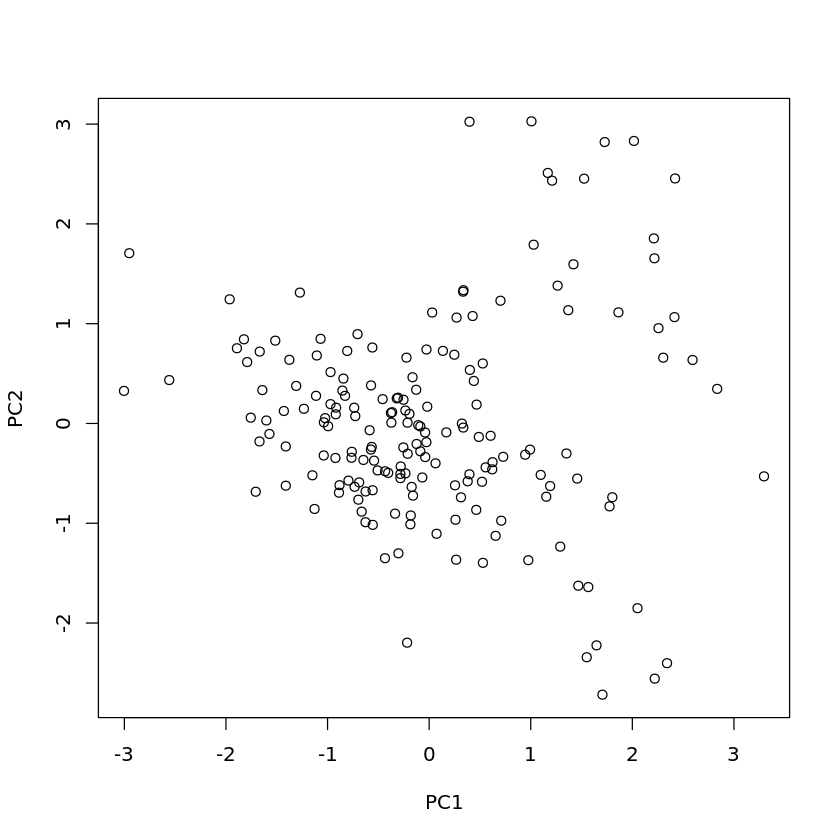

In [5]:
zAdaTepePC <- prcomp(zAdaTepe, rank = 2)
plot(zAdaTepePC$x)

### (iii)

Does this scatterplot suggest there are clusters in the data? If so, how many clusters do there appear to be?

#### Solution <a class="tocSkip">

There appears to be at least two clusters in the data, as there appears to be a group of observations towards the bottom right hand corner of the plot that are detached from the rest. 

## (d) Applying hierarchical clustering

Now, as we have got to know the data a little bit, it is time to actually apply hierarchical clustering to these data. 

### (i)

Using the code cell below, calculate the dissimilarity matrix for the data in `zadaTepe`. (Not the two-dimemsional approximation of it.)

Perform agglomerative hierarchical clustering using this dissimilarity matrix. Display the results in a dendrogram. 

#### Solution <a class="tocSkip">

Running the code below calculates the dissimilarity matrix, uses it to perform the agglomerative hierarchical clustering and then produces the required dendrogram.

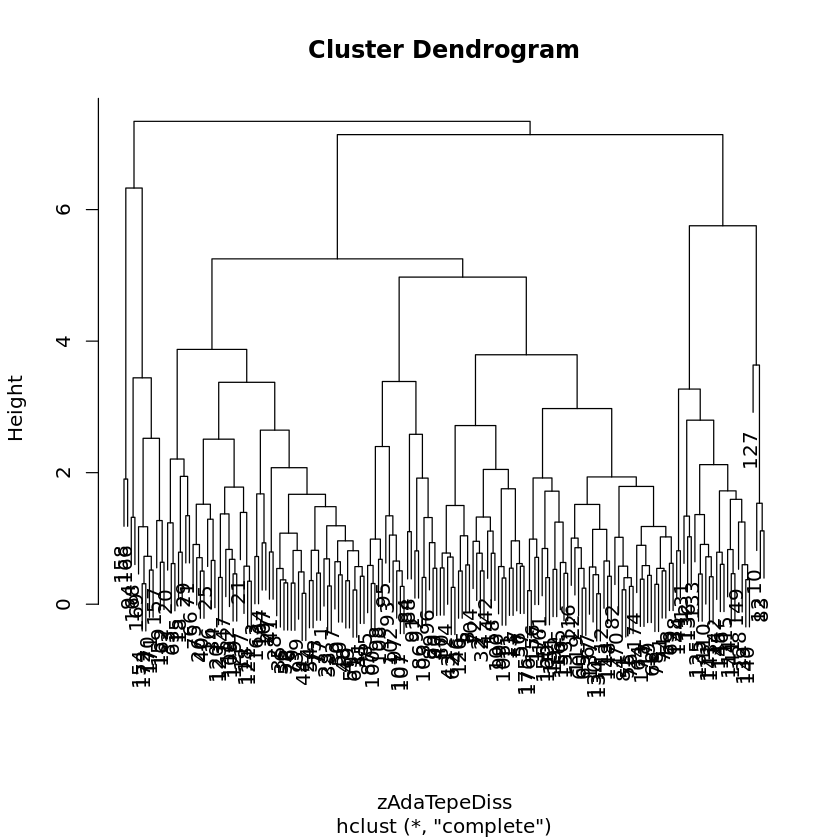

In [6]:
zAdaTepeDiss <- dist(zAdaTepe)
clusterSol <- hclust(zAdaTepeDiss)
plot(clusterSol)

### (ii)

Based on the dendrogram you obtained in part (d)(i), how many clusters does there appear to be in the data?

#### Solution <a class="tocSkip">

Looking at the dendrogram, the biggest changes in dissimilarity appear to happen going from 2 to 3 clusters and going from 3 to 4 clusters. So, this suggests there are 3 or 4 clusters.

### (iii)

From their analysis of the data, the archaeologists decided that there are four clusters in the data.

Using the clustering you have just done, obtain the cluster allocations for the four-cluster solution. 

#### Solution <a class="tocSkip">

The required cluster allocation is obtained by running the following code.

In [7]:
cutree(clusterSol, 4)

[1] 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
[112] 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 1
[149] 2 1 1 1 1 3 1 1 3 4 3 1 1 3 1 1 1 4 1 3 3 3 3 3 1 1 1 1 1

### (iv)

Are observations in the same cluster consecutive?  (In the data frame, the observations in the same clusters based on the archaeologists' analysis are consecutive.)

#### Solution <a class="tocSkip">

No, they are not consecutive. This suggests that we have a different four-cluster solution to that obtained by the archaeologists.

---

###  <a class="tocSkip">

We have now split the data into four clusters using agglomerative hierarchical clustering. The clusters happen to be different to those found by the archaeologists. An important question now is whether this clustering of the data is reasonable. 

We will answer this by looking at three plots:
* a plot of the 2-d approximation of the data, using different plotting symbols for the clusters
* a plot of the dissimilarity matrix, with observations arranged by cluster
* a plot of the silhouette statistics.

## (e) Plotting the clusters using the 2-d approximation of the data

Recall that, in Notebook activity 1.14, you produced scatterplots using colours for different levels of a factor. 

Once the cluster allocation has been saved in an object, the same process can be used to plot the four-cluster solution.

### (i)

Save the four-cluster solution in an object. Use this to produce a scatterplot using colours (and/or different plotting symbols for the different clusters. (Do not worry about adding the legend.)

#### Solution <a class="tocSkip">

Running the code below saves the four-cluster solution in an object called `clusterAllocation` and then uses it to produce the required scatterplot.

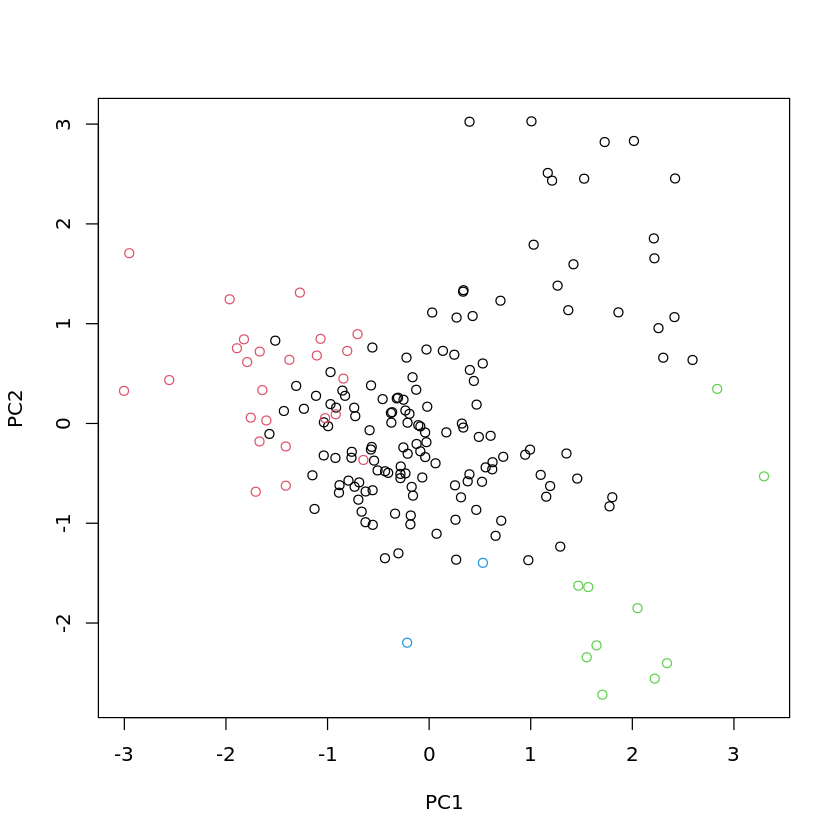

In [8]:
clusterAllocation <- cutree(clusterSol, k = 4)
plot(zAdaTepePC$x, col = clusterAllocation)

# Or using different plotting symbols
# plot(zAdaTepePC$x, pch = clusterAllocation)


### (ii)

Based on this plot, does the four-cluster solution look reasonable?

#### Solution <a class="tocSkip">

There is some overlap of points with different clusters. This suggests that the four-cluster solution has not identified distinct groups of observations. However, this is only an approximation of the data. It could be that the clusters are separated in ways that are not represented in this approximation.  

## (f) Plotting the dissimilarity matrix

A function for plotting the dissimilarity matrix is not included in the standard distribution of R. Instead, we will make use of a function included in the `M348` package. For these data, the appropriate command is as follows:
```
dissimPlot(zAdaTepeDiss, clusterAllocation)
```
Notice that the first argument gives the dissimilarity matrix to be plotted and the second argument gives the cluster allocation we want to use to order the observations.

### (i)

Plot the dissimilarity matrix, using the four-cluster solution we have obtained. 

#### Solution <a class="tocSkip">

The dissimilarity matrix is obtained by running the following code.

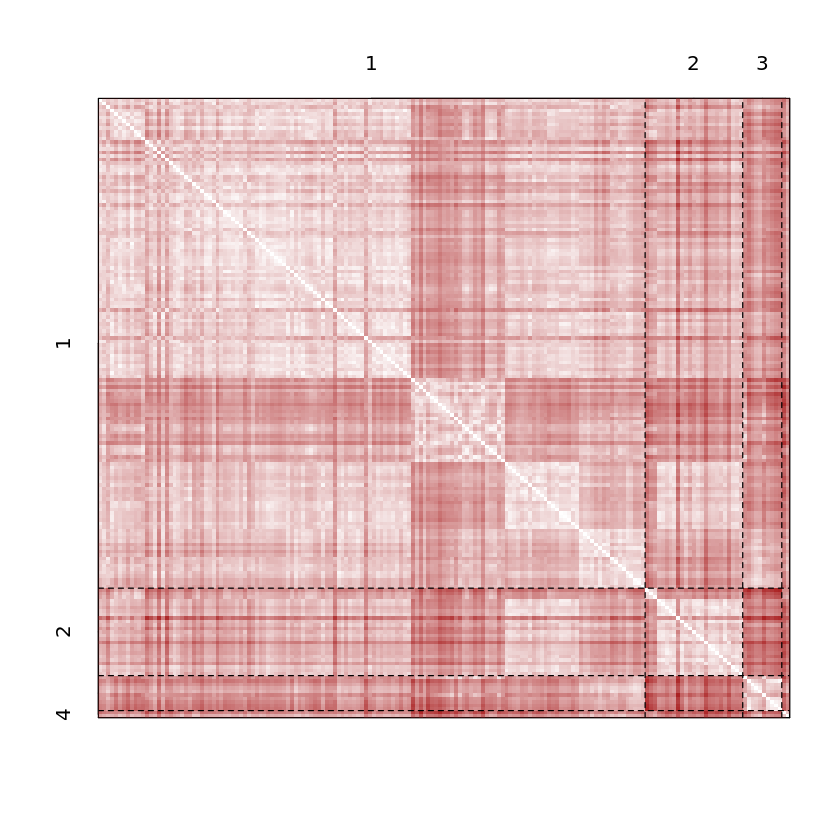

In [9]:
dissimPlot(zAdaTepeDiss, clusterAllocation)

### (ii)

Based on the dissimilarity plot, does the four-cluster solution look reasonable?

#### Solution <a class="tocSkip">

On the plot, blocks along the main diagonal do stand out, and correspond to low dissimilarities. So, the clustering has been generally successful in identifying observations that are similar.

## (g) Plotting the silhouette statistics

The calculation of silhouette statistics, as well as the plotting of them, are also things that are not included in the standard distribution of R. Instead, we will be relying on a couple of more functions included in the `M348` package.

The silhouette statistics for this clustering can be obtained using the following two commands.
```
zAdaTepeSilhouette <- silhouette(zAdaTepe, clusterAllocation)
silhouettePlot(zAdaTepeSilhouette)
```
The first command calculates the silhouette statistics for the given data frame and cluster allocation. The second command then creates the plot.

### (i)

Run these commands now to obtain a plot of the silhouette statistics for this four-cluster solution. 

In [ ]:
zAdaTepeSilhouette <- silhouette(zAdaTepe, clusterAllocation)
silhouettePlot(zAdaTepeSilhouette)

### (ii)

From this does the four-cluster solution seem like a good one?

#### Solution <a class="tocSkip">

For the smaller clusters, the values of the silhouette statistics are largely positive, suggesting that the clusters are reasonable ones. This is not the case for the largest cluster. Maybe this cluster is too big and splitting it would be better. Alternatively, maybe a different clustering method would find a better four-cluster solution.